# Global Model
Here we fit a global model using NeuralProphet. We adopt the ERCOT dataset for a simple example.
-hourly load for the Ercot region
-discuss global model
-define global

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
set_random_seed(8)
set_log_level("ERROR","INFO")

In [2]:
# data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
# df_ercot = pd.read_csv(data_location + "energy/ERCOT_load.csv")
data_location = '/mnt/c/Users/Pateu/Neural_Prophet_Project/other_files/'
df_ercot = pd.read_csv(data_location+'ERCOT_load_2004_2021Sept.csv')
df_ercot.head()

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,y
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61,22971.94
1,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88,22191.52
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42,21383.44
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49,20866.56
4,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32,20723.15


In [3]:
regions = list(df_ercot)[1:-1]
regions

['COAST',
 'EAST',
 'FAR_WEST',
 'NORTH',
 'NORTH_C',
 'SOUTHERN',
 'SOUTH_C',
 'WEST']

In [4]:
df_list=list()
for cols in regions:
    aux=df_ercot[['ds',cols]].copy()
    aux=aux.iloc[:26301,:].copy()
    aux=aux.rename(columns={cols:'y'})
    df_list.append(aux)

In [5]:
df_list

[                        ds        y
 0      2004-01-01 01:00:00  7225.09
 1      2004-01-01 02:00:00  6994.25
 2      2004-01-01 03:00:00  6717.42
 3      2004-01-01 04:00:00  6554.27
 4      2004-01-01 05:00:00  6511.19
 ...                    ...      ...
 26296  2006-12-31 20:00:00  8729.56
 26297  2006-12-31 21:00:00  8616.09
 26298  2006-12-31 22:00:00  8396.09
 26299  2006-12-31 23:00:00  8211.95
 26300  2007-01-01 00:00:00  8059.74
 
 [26301 rows x 2 columns],
                         ds        y
 0      2004-01-01 01:00:00   877.79
 1      2004-01-01 02:00:00   850.75
 2      2004-01-01 03:00:00   831.63
 3      2004-01-01 04:00:00   823.56
 4      2004-01-01 05:00:00   823.38
 ...                    ...      ...
 26296  2006-12-31 20:00:00  1231.66
 26297  2006-12-31 21:00:00  1213.86
 26298  2006-12-31 22:00:00  1207.63
 26299  2006-12-31 23:00:00  1149.33
 26300  2007-01-01 00:00:00  1133.27
 
 [26301 rows x 2 columns],
                         ds        y
 0      2004-01-0

In [6]:
m=NeuralProphet(n_lags=24)
df_train_list,df_test_list=m.split_df(df_list,freq='H',valid_p=0.33)

In [7]:
#Normalize each region separately:
df_train_list_n=list()
df_test_list_n=list()
i=1
for df_train,df_test in zip(df_train_list,df_test_list): 
    print(i)
    df_train_n=df_train.copy(deep=True)
    df_test_n=df_test.copy(deep=True)
    norm_parameter=df_train_n['y'].abs().max()
    df_train_n['y']=df_train_n['y']/norm_parameter
    df_test_n['y']=df_test_n['y']/norm_parameter
    df_train_list_n.append(df_train_n)
    df_test_list_n.append(df_test_n)   
    i=i+1

1
2
3
4
5
6
7
8


In [8]:
print(df_train_list[0].head())
print(df_train_list_n[0].head())
print(df_test_list[0].head())
print(df_test_list_n[0].head())

                   ds        y
0 2004-01-01 01:00:00  7225.09
1 2004-01-01 02:00:00  6994.25
2 2004-01-01 03:00:00  6717.42
3 2004-01-01 04:00:00  6554.27
4 2004-01-01 05:00:00  6511.19
                   ds         y
0 2004-01-01 01:00:00  0.434148
1 2004-01-01 02:00:00  0.420277
2 2004-01-01 03:00:00  0.403643
3 2004-01-01 04:00:00  0.393839
4 2004-01-01 05:00:00  0.391251
                       ds        y
17623 2006-01-04 08:00:00  8605.50
17624 2006-01-04 09:00:00  8552.17
17625 2006-01-04 10:00:00  8713.80
17626 2006-01-04 11:00:00  8947.05
17627 2006-01-04 12:00:00  9155.37
                       ds         y
17623 2006-01-04 08:00:00  0.517096
17624 2006-01-04 09:00:00  0.513891
17625 2006-01-04 10:00:00  0.523603
17626 2006-01-04 11:00:00  0.537619
17627 2006-01-04 12:00:00  0.550137


In [9]:
metrics = m.fit(df_train_list_n, freq='H')
metrics.tail()

  0%|          | 0/357 [00:00<?, ?it/s]

  0%|          | 0/357 [00:00<?, ?it/s]

  0%|          | 0/357 [00:00<?, ?it/s]

,SmoothL1Loss,MAE,RMSE,RegLoss
48,0.000181,0.007777,0.010458,0.0
49,0.000177,0.007639,0.010325,0.0
50,0.000174,0.007559,0.010238,0.0
51,0.000172,0.007486,0.010169,0.0
52,0.000170,0.007448,0.010129,0.0


## Test single region

In [11]:
region=3
print(f'Testing single region: {regions[region]}')
test_metrics=m.test(df_test_list_n[region])
test_metrics

Testing single region: NORTH


,SmoothL1Loss,MAE,RMSE
0,0.00152,0.02728,0.02906


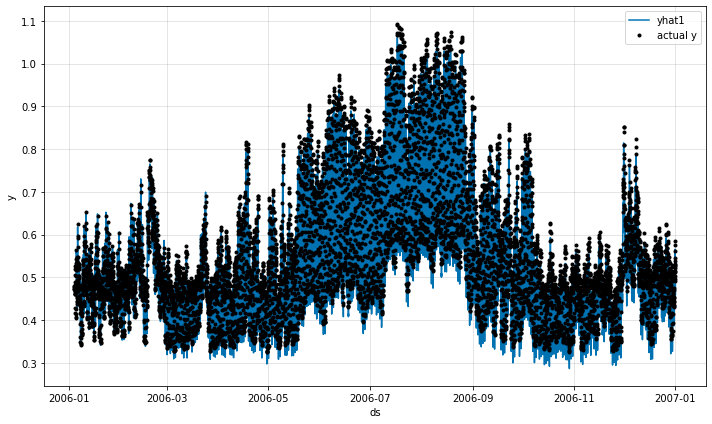

In [12]:
future = m.make_future_dataframe(df_test_list_n[region], n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

## Test all regions

In [13]:
test_metrics=m.test(df_test_list_n)
test_metrics

,SmoothL1Loss,MAE,RMSE
0,0.001568,0.027575,0.029771


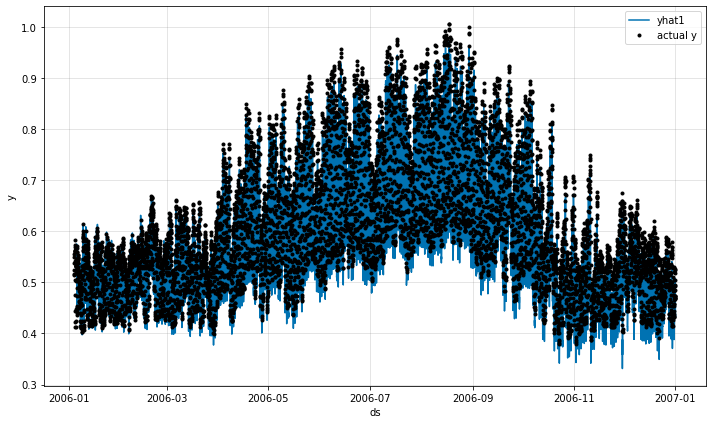

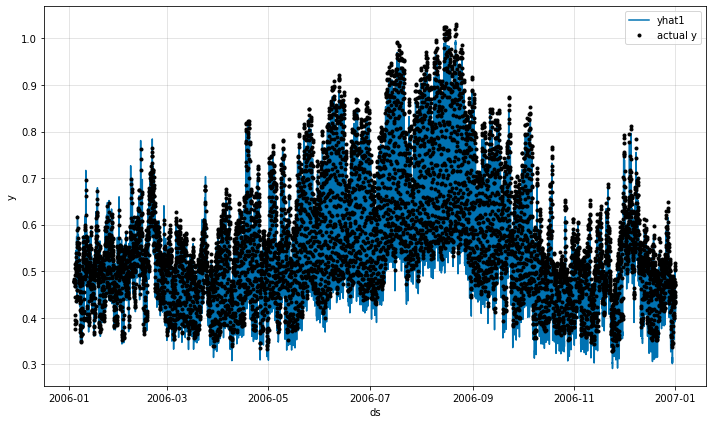

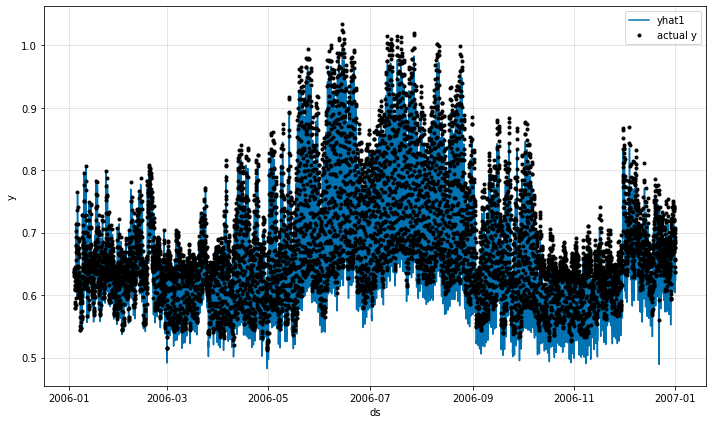

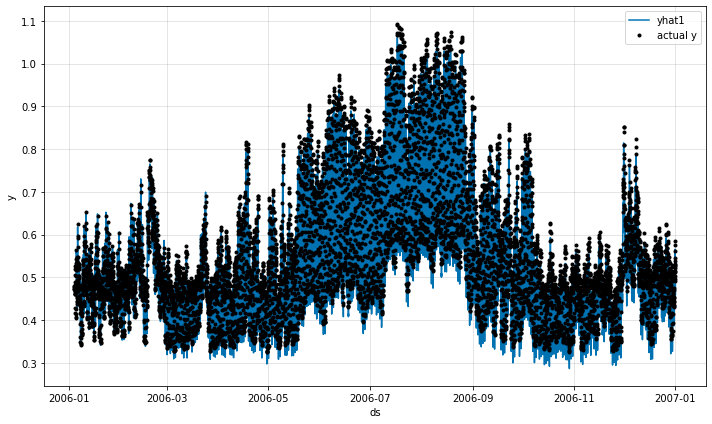

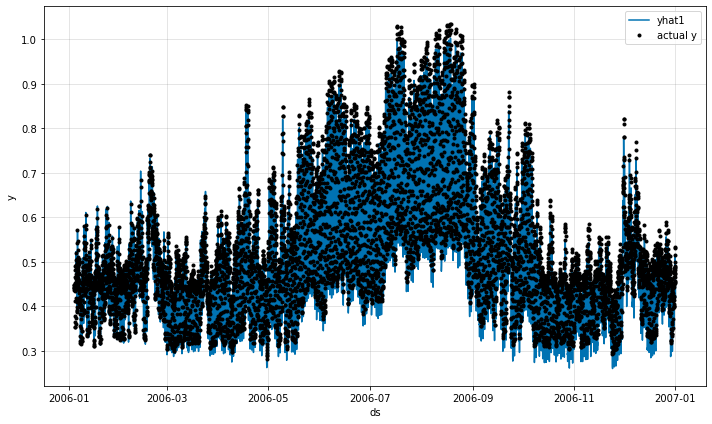

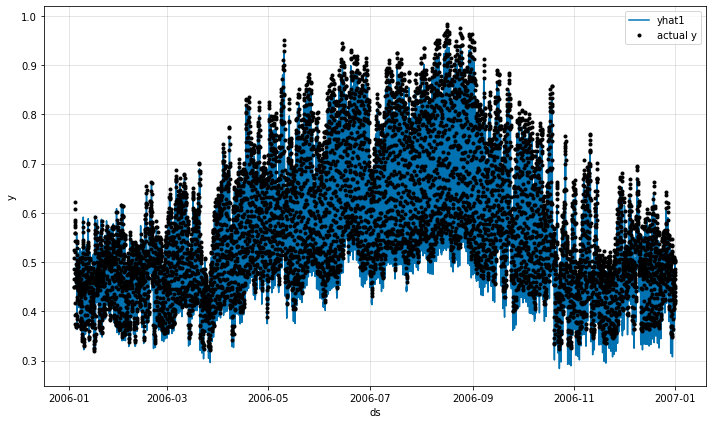

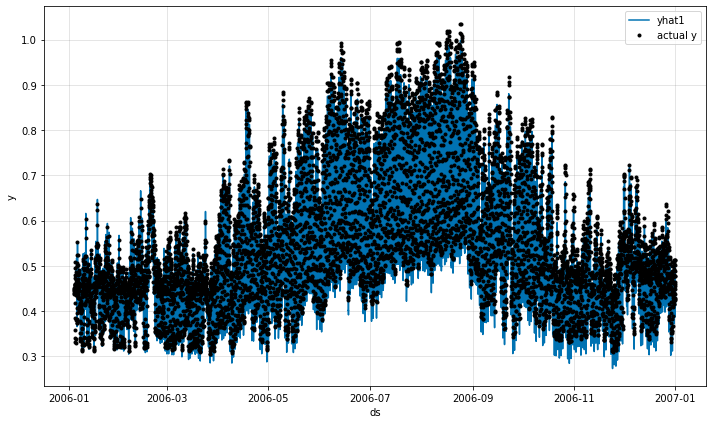

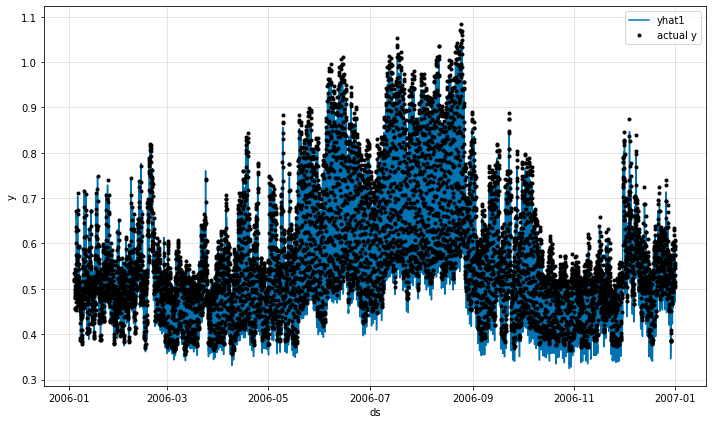

In [14]:
future = m.make_future_dataframe(df_test_list_n, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

In [15]:
# for frst in forecast:
#     fig_comp = m.plot_components(frst)

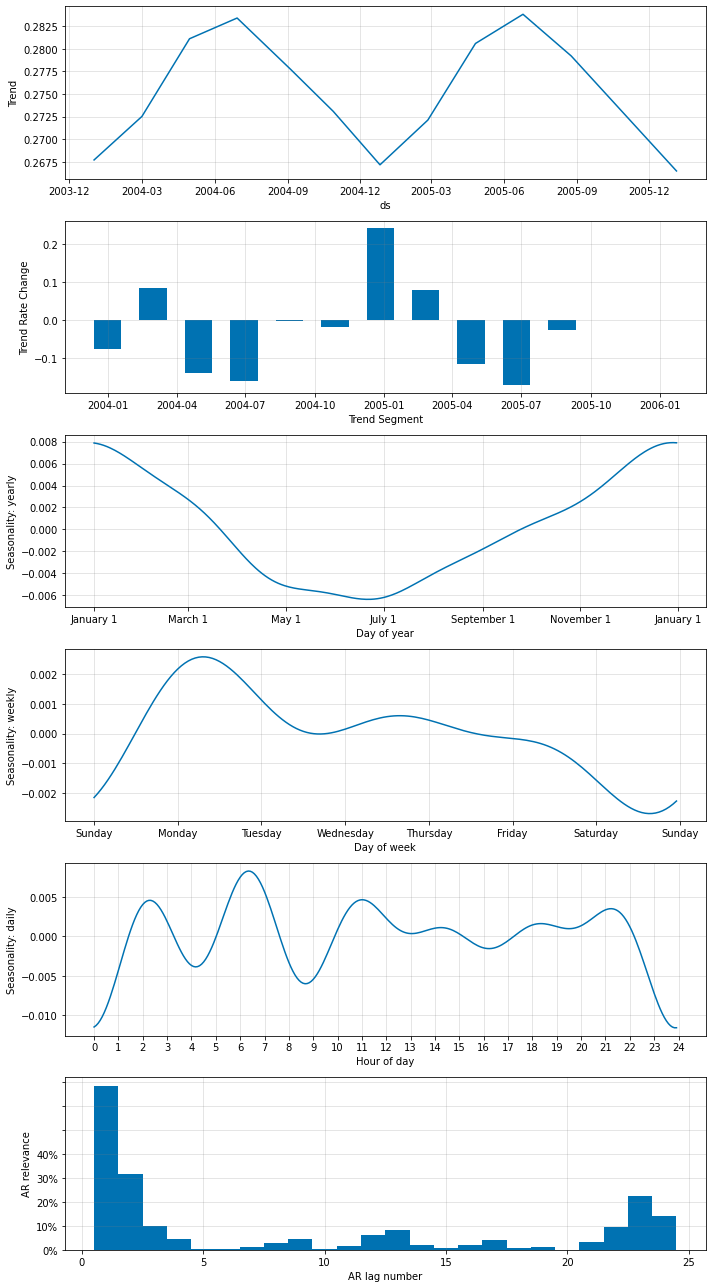

In [16]:
fig_param = m.plot_parameters()